<a href="https://colab.research.google.com/github/GurgenGulay/Banka_customer_churn/blob/main/Banka_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Açıklama:**
Bu veri seti, banka müşterileri ve bankadan çıkıp çıkmadıklarını gösteren müşteri kaybı durumları hakkında bilgi içerir. Bankacılık kurumlarında müşteri kaybını etkileyen faktörleri araştırmak ve analiz etmek ve kayıp riski altındaki müşterileri belirlemek için öngörücü modeller oluşturmak için uygundur.

# **Özellikler:**
*   RowNumber  : Veri kümesindeki her satıra atanan sıralı numara.
*   CustomerId: Her müşteri için benzersiz bir tanımlayıcı.
*   Surname  : Müşterinin soyadı.
*   CreditScore: Müşterinin kredi puanı.
*   Geography  : Müşterinin coğrafi konumu (örneğin, ülke veya bölge).
*   Gender  : Müşterinin cinsiyeti.
*   Age  : Müşterinin yaşı.
*   Tenure    : Müşterinin bankada geçirdiği yıl sayısı.
*   Balance  : Müşterinin hesap bakiyesi.
*   NumOfProducts: Müşterinin sahip olduğu banka ürünü sayısı.
*   HasCrCard: Müşterinin kredi kartı olup olmadığını belirtir (ikili: evet/hayır).
*   IsActiveMember: Müşterinin aktif bir üye olup olmadığını belirtir (ikili: evet/hayır).
*   EstimatedSalary  : Müşterinin tahmini maaşı.
*   Exited : Müşterinin bankadan çıkıp çıkmadığını belirtir (ikili: evet/hayır).



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)

print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2      0.000              1          1               1       101348.880       1
1          2    15647311      Hill          608     Spain  Female   41       1  83807.860              1          0               1       112542.580       0
2          3    15619304      Onio          502    France  Female   42       8 159660.800              3          1               0       113931.570       1
3          4    15701354      Boni          699    France  Female   39       1      0.000              2          0               0        93826.630       0
4          5    15737888  Mitchell          850     Spain  Female   43       2 125510.820              1          1               1        79084.100       0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 14)

# **KEŞİFCİ VERİ ANALİZİ**

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df_numeric)

##################### Shape #####################
(10000, 11)
##################### Types #####################
RowNumber            int64
CustomerId           int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
##################### Head #####################
   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602          619   42       2      0.000              1          1               1       101348.880       1
1          2    15647311          608   41       1  83807.860              1          0               1       112542.580       0
2          3    15619304          502   42       8 159660.800              3          1               0       113931.570       1
3          4

## NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 10000
Variables: 14
cat_cols: 6
num_cols: 7
cat_but_car: 1
num_but_cat: 4


In [ ]:
cat_cols

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [ ]:
num_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'EstimatedSalary']

In [ ]:
cat_but_car

['Surname']

## KATEGORİK DEĞİŞKENLERİN ANALİZİ

In [ ]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

           Geography  Ratio
Geography                  
France          5014 50.140
Germany         2509 25.090
Spain           2477 24.770
##########################################


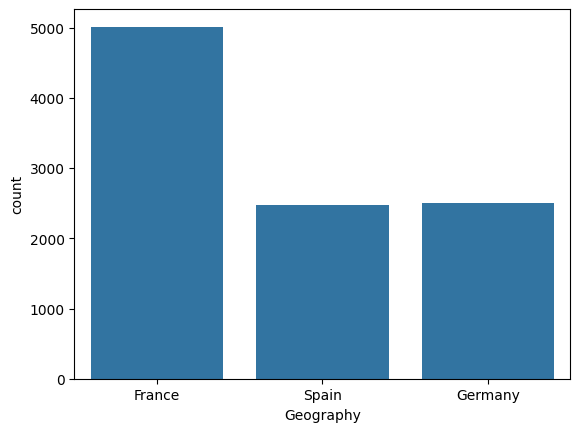

        Gender  Ratio
Gender               
Male      5457 54.570
Female    4543 45.430
##########################################


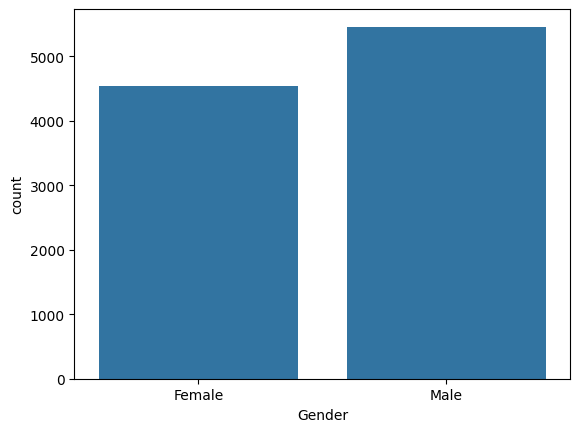

               NumOfProducts  Ratio
NumOfProducts                      
1                       5084 50.840
2                       4590 45.900
3                        266  2.660
4                         60  0.600
##########################################


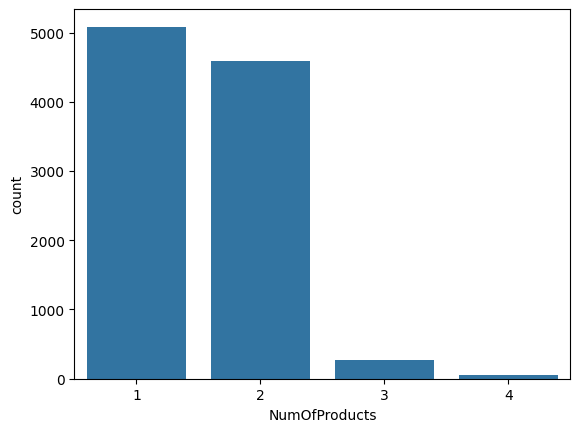

           HasCrCard  Ratio
HasCrCard                  
1               7055 70.550
0               2945 29.450
##########################################


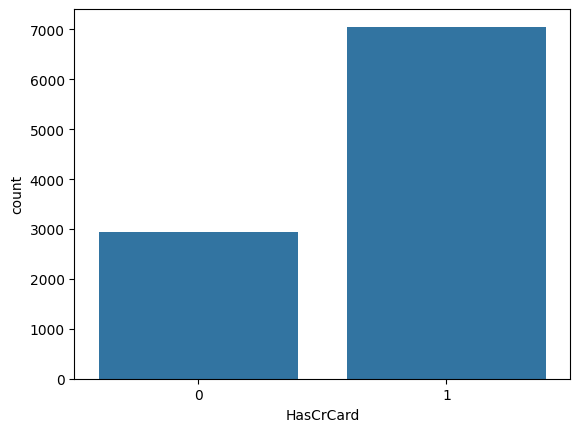

                IsActiveMember  Ratio
IsActiveMember                       
1                         5151 51.510
0                         4849 48.490
##########################################


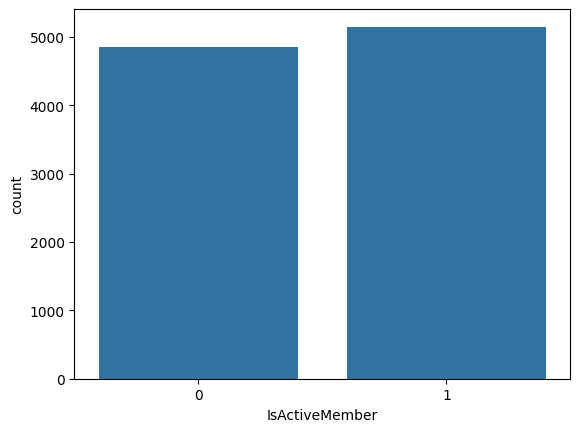

        Exited  Ratio
Exited               
0         7963 79.630
1         2037 20.370
##########################################


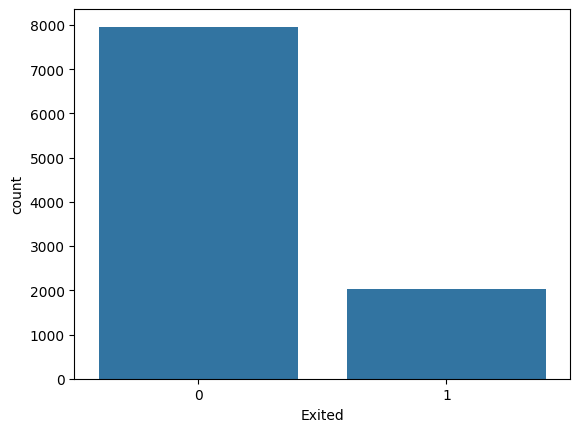

In [ ]:
for col in cat_cols:
    cat_summary(df, col)

## NUMERİK DEĞİŞKENLERİN ANALİZİ

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)  # değer
        plt.title(numerical_col)   # frekans
        plt.show()

count   10000.000
mean     5000.500
std      2886.896
min         1.000
5%        500.950
10%      1000.900
20%      2000.800
30%      3000.700
40%      4000.600
50%      5000.500
60%      6000.400
70%      7000.300
80%      8000.200
90%      9000.100
95%      9500.050
99%      9900.010
max     10000.000
Name: RowNumber, dtype: float64


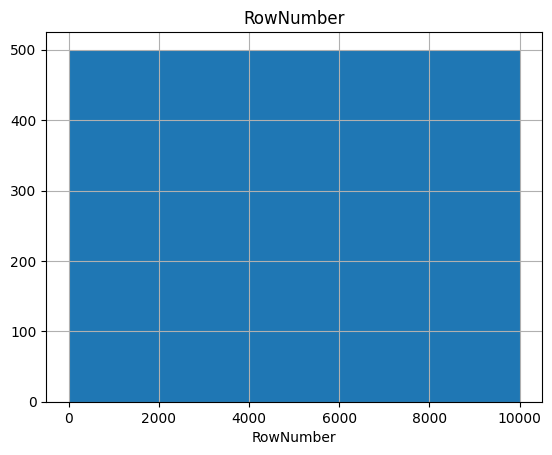

count      10000.000
mean    15690940.569
std        71936.186
min     15565701.000
5%      15578824.200
10%     15591167.100
20%     15616377.400
30%     15641363.900
40%     15665787.600
50%     15690738.000
60%     15715686.600
70%     15740461.600
80%     15765818.800
90%     15790830.700
95%     15803034.300
99%     15813113.190
max     15815690.000
Name: CustomerId, dtype: float64


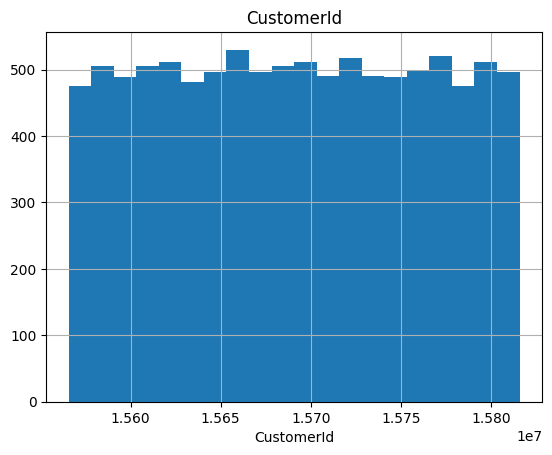

count   10000.000
mean      650.529
std        96.653
min       350.000
5%        489.000
10%       521.000
20%       566.000
30%       598.700
40%       627.000
50%       652.000
60%       678.000
70%       704.000
80%       735.000
90%       778.000
95%       812.000
99%       850.000
max       850.000
Name: CreditScore, dtype: float64


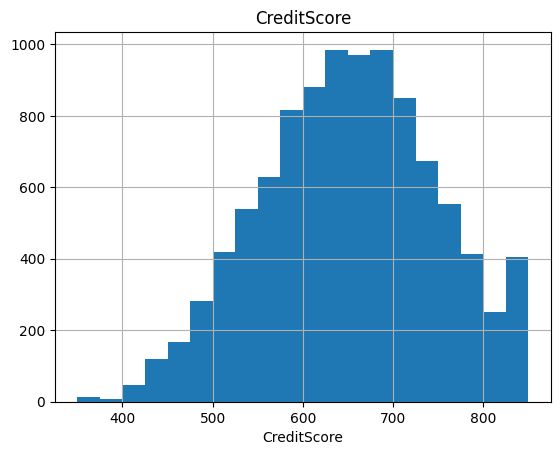

count   10000.000
mean       38.922
std        10.488
min        18.000
5%         25.000
10%        27.000
20%        31.000
30%        33.000
40%        35.000
50%        37.000
60%        40.000
70%        42.000
80%        46.000
90%        53.000
95%        60.000
99%        72.000
max        92.000
Name: Age, dtype: float64


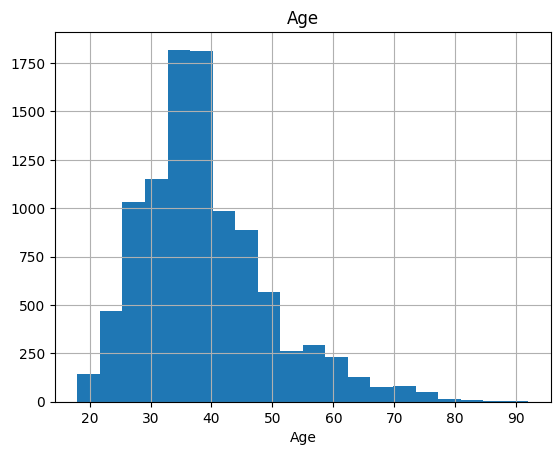

count   10000.000
mean        5.013
std         2.892
min         0.000
5%          1.000
10%         1.000
20%         2.000
30%         3.000
40%         4.000
50%         5.000
60%         6.000
70%         7.000
80%         8.000
90%         9.000
95%         9.000
99%        10.000
max        10.000
Name: Tenure, dtype: float64


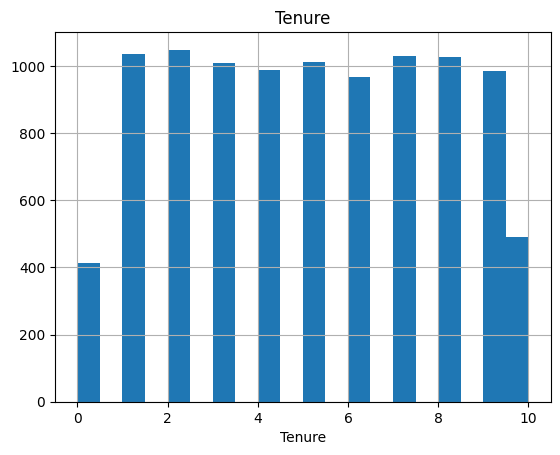

count    10000.000
mean     76485.889
std      62397.405
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%      73080.908
50%      97198.540
60%     110138.926
70%     122029.870
80%     133710.358
90%     149244.792
95%     162711.669
99%     185967.985
max     250898.090
Name: Balance, dtype: float64


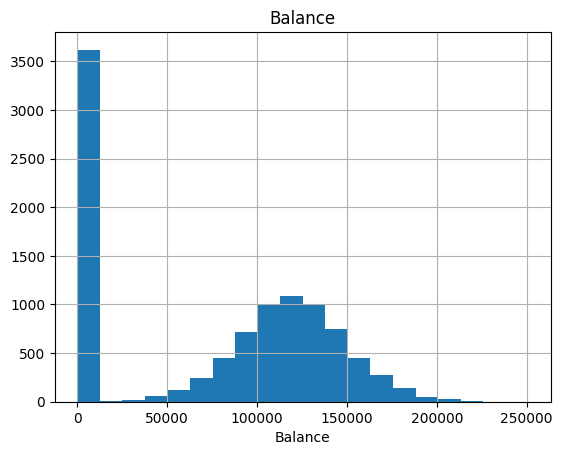

count    10000.000
mean    100090.240
std      57510.493
min         11.580
5%        9851.819
10%      20273.580
20%      41050.736
30%      60736.079
40%      80238.340
50%     100193.915
60%     119710.038
70%     139432.236
80%     159836.726
90%     179674.704
95%     190155.375
99%     198069.734
max     199992.480
Name: EstimatedSalary, dtype: float64


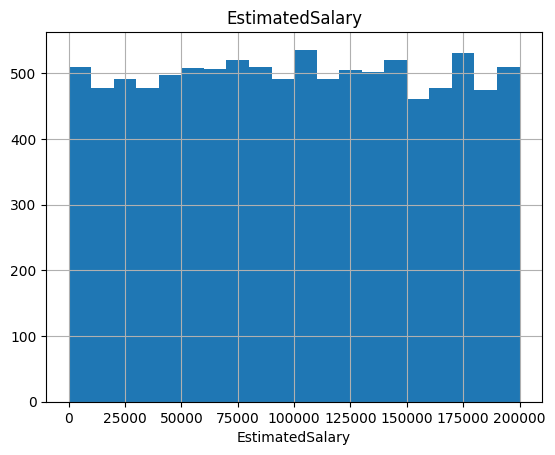

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)

## NUMERİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Exited", col)

        RowNumber
Exited           
0        5024.695
1        4905.918


         CustomerId
Exited             
0      15691167.882
1      15690051.965


        CreditScore
Exited             
0           651.853
1           645.351


          Age
Exited       
0      37.408
1      44.838


        Tenure
Exited        
0        5.033
1        4.933


         Balance
Exited          
0      72745.297
1      91108.539


        EstimatedSalary
Exited                 
0             99738.392
1            101465.678




## KATEGORİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Exited", col)

Geography
           TARGET_MEAN  Count  Ratio
Geography                           
France           0.162   5014 50.140
Germany          0.324   2509 25.090
Spain            0.167   2477 24.770


Gender
        TARGET_MEAN  Count  Ratio
Gender                           
Female        0.251   4543 45.430
Male          0.165   5457 54.570


NumOfProducts
               TARGET_MEAN  Count  Ratio
NumOfProducts                           
1                    0.277   5084 50.840
2                    0.076   4590 45.900
3                    0.827    266  2.660
4                    1.000     60  0.600


HasCrCard
           TARGET_MEAN  Count  Ratio
HasCrCard                           
0                0.208   2945 29.450
1                0.202   7055 70.550


IsActiveMember
                TARGET_MEAN  Count  Ratio
IsActiveMember                           
0                     0.269   4849 48.490
1                     0.143   5151 51.510


Exited
        TARGET_MEAN  Count  Ratio
Exited    

In [ ]:
df[num_cols].corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,-0.006
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.015
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,-0.001
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.007
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.008
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,0.013
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,1.000


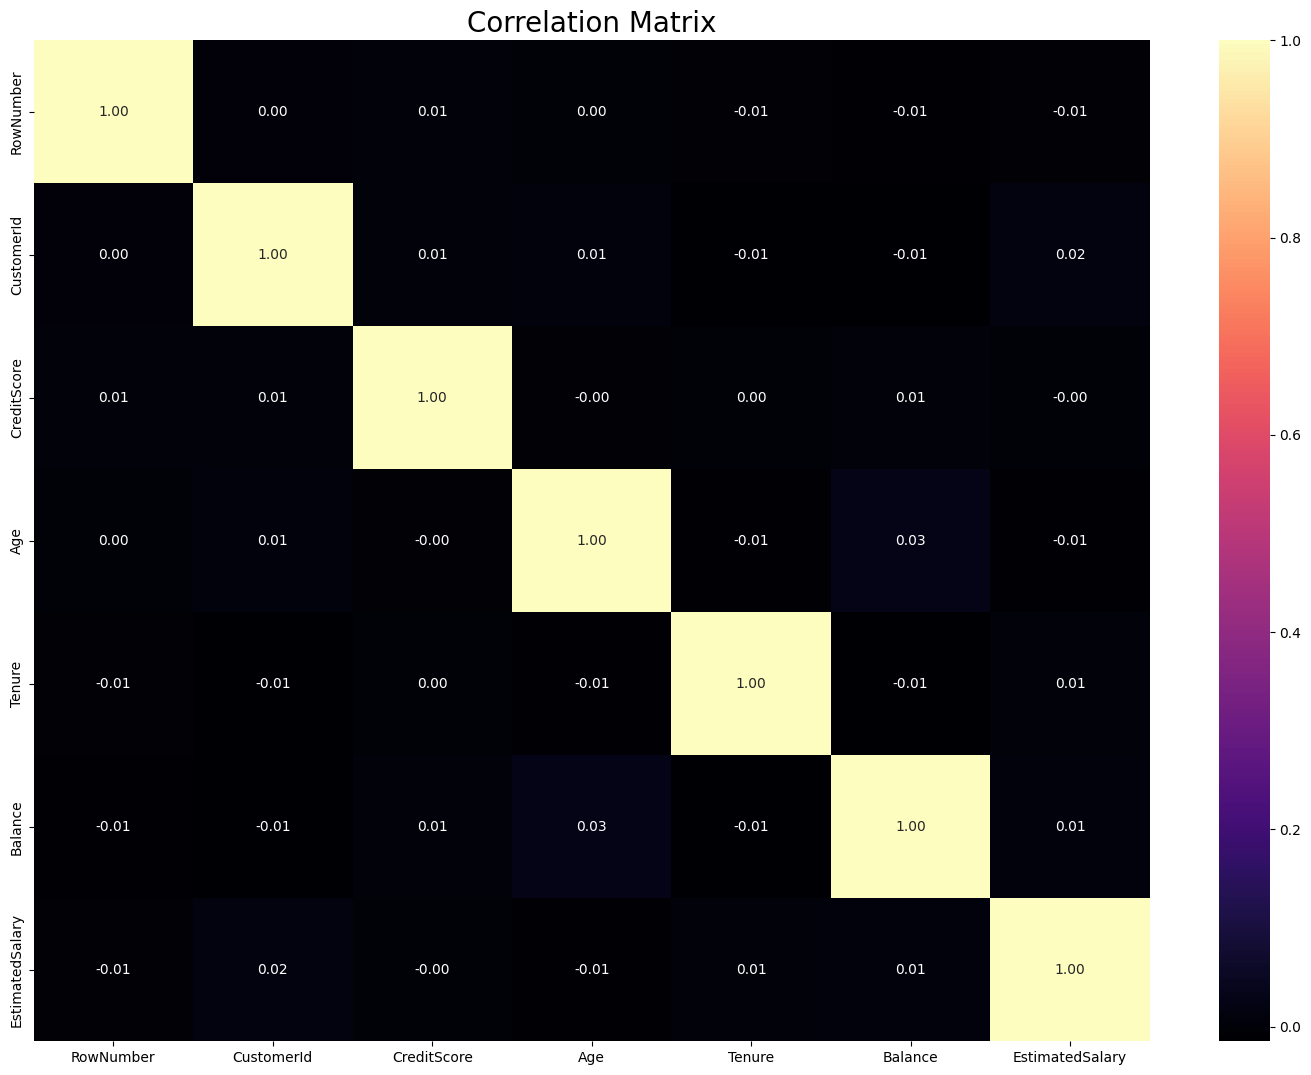

In [ ]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# **FEATURE ENGINEERING**

## EKSİK DEĞER ANALİZİ

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## AYKIRI DEĞER ANALİZİ

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

RowNumber False
CustomerId False
CreditScore False
Age False
Tenure False
Balance False
EstimatedSalary False


## YENİ DEĞİŞKEN OUŞTURMA İLE ÖZELLİK ÇIKARIMI

In [ ]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[0, 2, 6, 11], labels=['New_Customer', 'Average_Cus', 'Old_Cus'])

In [ ]:
# Müşterinin Varlık Durumu
df['Wealth_Status'] = df['Balance'] / df['EstimatedSalary']

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, float('inf')], labels=['Young', 'Middle-aged', 'Elderly'])

In [ ]:
# Müşterinin Kredi Puanı
df['CreditScore_Category'] = pd.cut(df['CreditScore'], bins=[0, 489, 652, 850], labels=['Low', 'Medium', 'High'])

In [ ]:
# Balance Aralıkları
df['Balance_Category'] = pd.cut(df['Balance'], bins=[0, 97198.540, 162711.669, 185967.985, 250898.090, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Unknown'], right=False)

In [ ]:
df['Tenure'].max()

10

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Category,Wealth_Status,Age_Group,CreditScore_Category,Balance_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,New_Customer,0.000,Middle-aged,Medium,Low
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,New_Customer,0.745,Middle-aged,Medium,Low
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,Old_Cus,1.401,Middle-aged,Medium,Medium
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0,New_Customer,0.000,Middle-aged,High,Low
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,New_Customer,1.587,Middle-aged,High,Medium


In [ ]:
df.shape

(10000, 19)

## ENCODING

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 10000
Variables: 19
cat_cols: 10
num_cols: 8
cat_but_car: 1
num_but_cat: 8




*   LABEL ENCODING




In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols   # [Gender]

['Gender']

In [ ]:
for col in binary_cols:
    df = label_encoder(df, col)



*   RARE ANALYSER




In [ ]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")



rare_analyser(df, "Exited", cat_cols)

Geography : 3
           COUNT  RATIO  TARGET_MEAN
Geography                           
France      5014  0.501        0.162
Germany     2509  0.251        0.324
Spain       2477  0.248        0.167


Gender : 2
        COUNT  RATIO  TARGET_MEAN
Gender                           
0        4543  0.454        0.251
1        5457  0.546        0.165


NumOfProducts : 4
               COUNT  RATIO  TARGET_MEAN
NumOfProducts                           
1               5084  0.508        0.277
2               4590  0.459        0.076
3                266  0.027        0.827
4                 60  0.006        1.000


HasCrCard : 2
           COUNT  RATIO  TARGET_MEAN
HasCrCard                           
0           2945  0.294        0.208
1           7055  0.706        0.202


IsActiveMember : 2
                COUNT  RATIO  TARGET_MEAN
IsActiveMember                           
0                4849  0.485        0.269
1                5151  0.515        0.143


Exited : 2
        COUNT  RATIO

In [ ]:
df.drop(columns=["Surname"], inplace=True)

In [ ]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64



*   One-Hot Encoding




In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['Geography',
 'NumOfProducts',
 'Tenure_Category',
 'Age_Group',
 'CreditScore_Category',
 'Balance_Category']

In [ ]:
def oneHotEncoder(dataframe, categoricalCols, drop_first = False):
    dataframe = pd.get_dummies(dataframe, columns=categoricalCols,drop_first=drop_first)
    return dataframe
df = oneHotEncoder(df, ohe_cols)
df.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Wealth_Status,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_Category_New_Customer,Tenure_Category_Average_Cus,Tenure_Category_Old_Cus,Age_Group_Young,Age_Group_Middle-aged,Age_Group_Elderly,CreditScore_Category_Low,CreditScore_Category_Medium,CreditScore_Category_High,Balance_Category_Low,Balance_Category_Medium,Balance_Category_High,Balance_Category_Very High,Balance_Category_Unknown
0,1,15634602,619,0,42,2,0.000,1,1,101348.880,1,0.000,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False
1,2,15647311,608,0,41,1,83807.860,0,1,112542.580,0,0.745,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False
2,3,15619304,502,0,42,8,159660.800,1,0,113931.570,1,1.401,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False
3,4,15701354,699,0,39,1,0.000,0,0,93826.630,0,0.000,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False
4,5,15737888,850,0,43,2,125510.820,1,1,79084.100,0,1.587,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 10000
Variables: 33
cat_cols: 25
num_cols: 8
cat_but_car: 0
num_but_cat: 25


In [ ]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Exited"]]
cat_cols

['HasCrCard',
 'IsActiveMember',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'NumOfProducts_1',
 'NumOfProducts_2',
 'NumOfProducts_3',
 'NumOfProducts_4',
 'Tenure_Category_New_Customer',
 'Tenure_Category_Average_Cus',
 'Tenure_Category_Old_Cus',
 'Age_Group_Young',
 'Age_Group_Middle-aged',
 'Age_Group_Elderly',
 'CreditScore_Category_Low',
 'CreditScore_Category_Medium',
 'CreditScore_Category_High',
 'Balance_Category_Low',
 'Balance_Category_Medium',
 'Balance_Category_High',
 'Balance_Category_Very High',
 'Balance_Category_Unknown']

In [ ]:
rare_analyser(df, "Exited", cat_cols)

HasCrCard : 2
           COUNT  RATIO  TARGET_MEAN
HasCrCard                           
0           2945  0.294        0.208
1           7055  0.706        0.202


IsActiveMember : 2
                COUNT  RATIO  TARGET_MEAN
IsActiveMember                           
0                4849  0.485        0.269
1                5151  0.515        0.143


Geography_France : 2
                  COUNT  RATIO  TARGET_MEAN
Geography_France                           
False              4986  0.499        0.246
True               5014  0.501        0.162


Geography_Germany : 2
                   COUNT  RATIO  TARGET_MEAN
Geography_Germany                           
False               7491  0.749        0.163
True                2509  0.251        0.324


Geography_Spain : 2
                 COUNT  RATIO  TARGET_MEAN
Geography_Spain                           
False             7523  0.752        0.216
True              2477  0.248        0.167


NumOfProducts_1 : 2
                 COUNT  RATIO 

In [ ]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]
useless_cols   # nadir sınıflara sahip gereksiz sütunlar karmaşıklığı azaltmak için ama kaldırmak gereksiz görülmüştür

['NumOfProducts_4', 'Balance_Category_Very High', 'Balance_Category_Unknown']

In [ ]:
df.shape

(10000, 33)

## Standart Scaler

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Wealth_Status
0,-1.732,-0.783,-0.326,0.294,-1.042,-1.226,0.022,-0.036
1,-1.732,-0.607,-0.440,0.198,-1.388,0.117,0.217,-0.029
2,-1.731,-0.996,-1.537,0.294,1.033,1.333,0.241,-0.023
3,-1.731,0.145,0.502,0.007,-1.388,-1.226,-0.109,-0.036
4,-1.730,0.653,2.064,0.389,-1.042,0.786,-0.365,-0.021


# **MODELLEME**

In [ ]:
y = df["Exited"]
X = df.drop(["CustomerId", "Exited"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

## **kNN**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier().fit(X, y)

In [ ]:
random_user = X.sample(1, random_state=49)

knn_model.predict(random_user)

array([0])


*   **Hyperparameter Optimization**




In [ ]:
knn_model = KNeighborsClassifier()
knn_model.get_params()

knn_params = {"n_neighbors": range(2, 50)}
knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

knn_gs_best.best_params_
# {'n_neighbors': 13}

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 13}

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)
cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()

0.8309000000000001

In [ ]:
y_pred = knn_final.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7963
           1       0.78      0.35      0.49      2037

    accuracy                           0.85     10000
   macro avg       0.82      0.66      0.70     10000
weighted avg       0.84      0.85      0.82     10000



In [ ]:
y_probs = knn_model.predict_proba(X)
roc_auc_scores = roc_auc_score(pd.get_dummies(y), y_probs, multi_class="ovr")

print("Macro Average ROC AUC Score:", roc_auc_scores)

Macro Average ROC AUC Score: 0.8796022485191852


In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Confusion Matrix:
[[7757  206]
 [1317  720]]
Sensitivity: 0.35346097201767307
Specificity: 0.9741303528820796


In [ ]:
kappa = cohen_kappa_score(y, y_pred)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.4110020637745154




---



## **SVM**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn import datasets, svm
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

In [ ]:
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.8767142857142857
test accuracy: 0.8586666666666667


In [ ]:
y_pred = svm.predict(X_test)

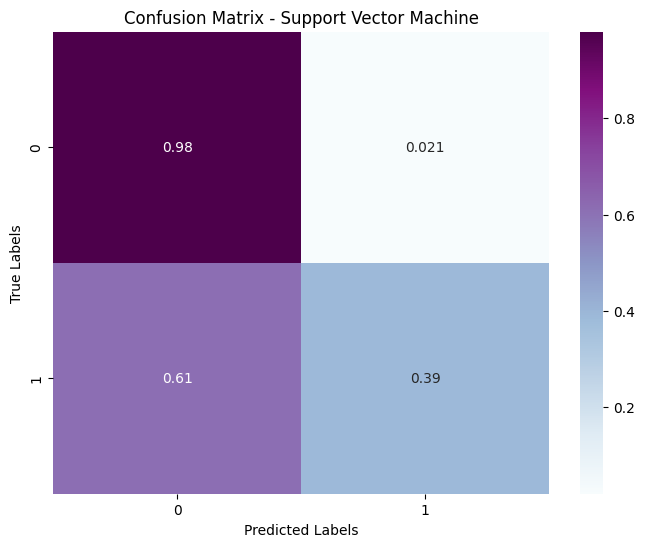

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred, normalize='true')

labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

report=classification_report(y_test, svm.predict(X_test))
print("Classification Report:")

lines = report.split('\n')
for line in lines:
    print(line)

Accuracy: 85.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2387
           1       0.83      0.39      0.53       613

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
from sklearn.preprocessing import label_binarize

y_scores = svm.decision_function(X_test)
y_test_bin = label_binarize(y_test, classes=svm.classes_)

auc_score = roc_auc_score(y_test_bin, y_scores, average='weighted', multi_class='ovr')
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.8211171031778304


Test ROC AUC: 0.8211171031778304


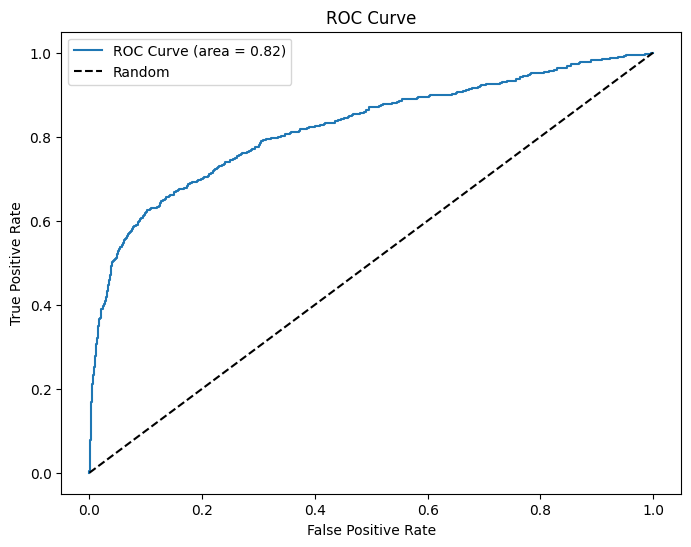

In [ ]:
roc_auc_test = roc_auc_score(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)
print("Test ROC AUC:", roc_auc_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

svm_sensitivity = TP / (TP + FN)
svm_specificity = TN / (TN + FP)

print("Sensitivity:", svm_sensitivity)
print("Specificity:", svm_specificity)

Sensitivity: 0.3898858075040783
Specificity: 0.9790532048596565


In [ ]:
observed_accuracy = accuracy_score(y_test, y_pred)
expected_accuracy = ((TN + FP) * (TN + FN) + (FP + TP) * (FN + TP)) / (len(y_test) ** 2)
svm_kappa = (observed_accuracy - expected_accuracy) / (1 - expected_accuracy)
print("Kappa:", svm_kappa)

Kappa: 0.4591114630099429
